## Exceptions IV
### Passing on an exception to a calling function

__In this notebook we discuss how to pass on the responsibility of handling exceptions to a function other than the one where the exception occured.__

__In the previous example, all exception handling is done within the method or function where the error occurred.  But sometimes, we may want the error handling to be performed by another function.  This will be one of the functions in the calling hierarchy. That is, let us suppose that `function_a` called `function_b` which called `function_c.`  
In this case, the function_hierarchy is `function_a,` `function_b` and `function_c.`
Let us also suppose, an error occured when executing `function_c.` Then any one of the functions in the hierarchy 
can handle the exception.  If function_c (the default) does not handle it, we can pass the exception to `function_b` and if that does not handle it, then the exception can be passed to `function_a.`__

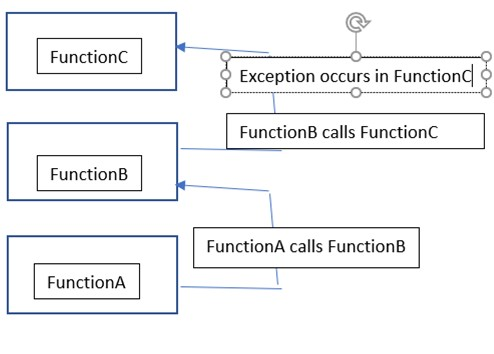

__Let us first begin by looking at the structure of the program below. The program calls the main function.  The `main()` function calls the `open_files()` function. The main function also has a try block which calls `process_data().`  Since calling an existing function is not an error, no error will be directly generated in the `main()` function.__

__Now let us look at the `open_files()` function.  If the `FileNotFoundError` exception is generated, the except block
will be executed and the program will terminate in a graceful manner. If any other exception is triggered in this function, the program will terminate abruptly since there is no catch-all (untyped) except block.__

__Now for the `process_data()` function.  One of two errors can occur here as we have seen in the earlier examples. However, there is no `try` block.  Therefore, the exception is passed back to the function that called `process_data()` -- the `main()` function. This does have a `try/except` block and handles the exceptions as we have already discussed.__

__Further note that since the `main()` function does not have a generic `try/except` block, the program would terminate
abruptly if any other exception, (i.e., other than the `ZeroDivisionError` exception and the `ValueError` exception),  were to be generated in the `process_data()` funtion.__

In [4]:
import sys #Note that we import the sys module to take care of abnormal termination of the program

# Define the main function.  We have broken down the tasks into open file, process and close files.
# The ZeroDivisionError and ValueError are generated in the process_data() function 
# but will be handled in the main() function
def main():
    file_lst = open_files()
    try:
        process_data(file_lst)
    except ZeroDivisionError:
        print('Division by zero is not allowed!!\nPrinting from main function')
    except ValueError:
        print('You need to enter a numeric value\nPrinting from main function')
    close_files(file_lst)

# Open files. The FileNotFoundError is handled where it is generated
def open_files():
    try:
        f = open('input.txt', 'r')
        f2 = open('output.txt', 'w') 
        return ([f, f2])
    except FileNotFoundError: 
        print('File Does Not Exist\nPrinting from open_files() function') 
        sys.exit()

def close_files(file_lst):
    file_lst[0].close()
    file_lst[1].close()

# Any Division by Zero or ValueError generated here will be passed on to the calling function:
# the main() function where they will be handled.
# Note that since the main() function does not have a catch-all except block, any other exceptions will not be handled.
def process_data(file_lst):
    f = file_lst[0]
    f2 = file_lst[1]
    for line in f:
        n_lst = line.split(',')
        n1 = int(n_lst[0])
        n2 = int(n_lst[1])
        quo = n1/n2
        my_quo = '{0:3.2f}'.format(quo)
        f2.write(str(n1)+','+str(n2)+','+ str(my_quo) +'\n')

main()